In [50]:
import numpy as np
import pandas as pd
iris=pd.read_csv('AI-MLData/iris.csv')
#iris.info()
iris.replace({'variety':{'Setosa':0,'Virginica':1,'Versicolor':2}},inplace=True)

C:\Users\skjha\AppData\Local\Temp\ipykernel_17628\1009210705.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris.replace({'variety':{'Setosa':0,'Virginica':1,'Versicolor':2}},inplace=True)


In [52]:
iris['variety'].value_counts()

variety
0    51
2    50
1    49
Name: count, dtype: int64

In [54]:
Y=iris['variety']
X=iris.drop(['variety'],axis=1)


In [56]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=.2,random_state=0)
Y_Train

137    1
84     2
27     0
127    1
132    1
      ..
9      0
103    1
67     2
117    1
47     0
Name: variety, Length: 120, dtype: int64

In [58]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier(random_state=0)


In [60]:
treemodel.fit(X_Train,Y_Train)


DecisionTreeClassifier(random_state=0)

[Text(0.4375, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 43, 37]'),
 Text(0.375, 0.7857142857142857, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.509\nsamples = 81\nvalue = [1, 43, 37]'),
 Text(0.25, 0.6428571428571429, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(0.125, 0.5, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.0625, 0.35714285714285715, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]'),
 Text(0.1875, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.375, 0.5, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.3125, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.4375, 0.35714285714285715, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.375, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5, 0.21428571428571427, 'g

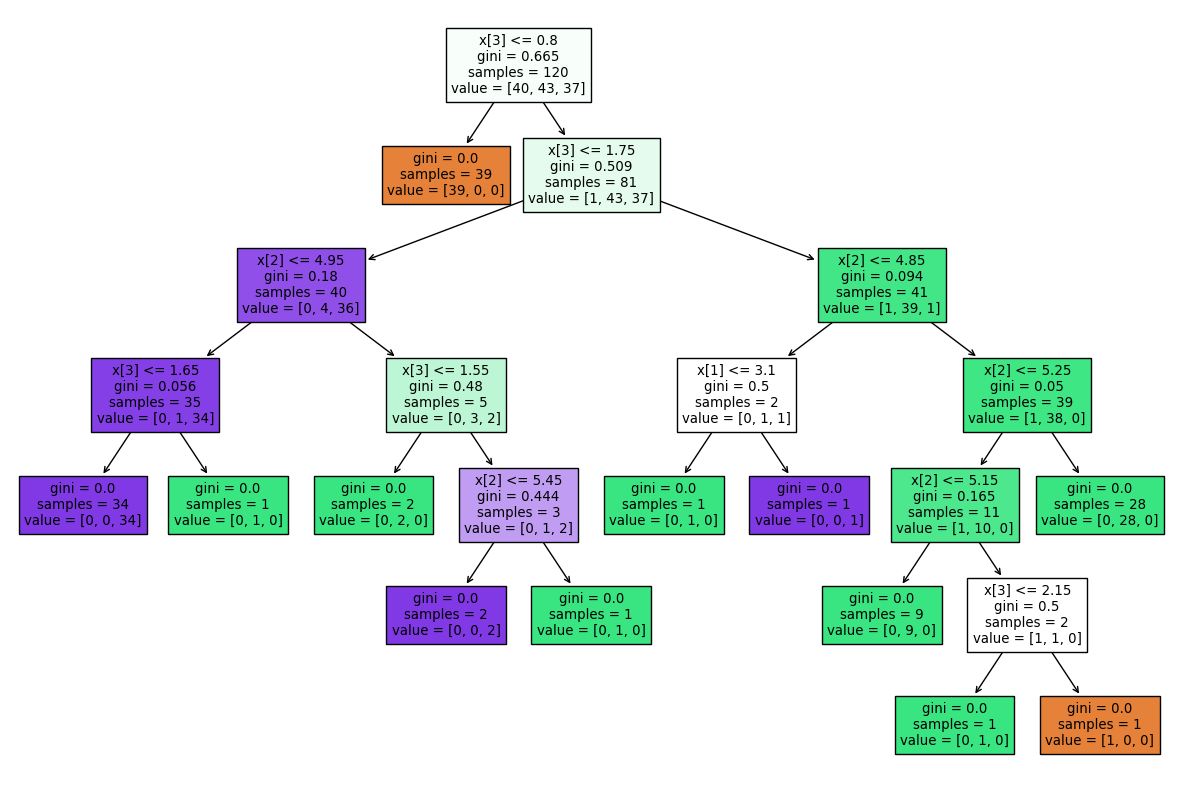

In [66]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)


In [68]:
Y_Predict=treemodel.predict(X_Test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_Test,Y_Predict)

1.0

In [88]:
treemodel1=DecisionTreeClassifier(max_depth=3)


In [90]:
treemodel1.fit(X_Train,Y_Train)


DecisionTreeClassifier(max_depth=3)

In [92]:
Y_Predict1=treemodel1.predict(X_Test)


In [78]:
accuracy_score(Y_Predict1,Y_Test)

0.9666666666666667

In [94]:
#Prunning
path=treemodel.cost_complexity_pruning_path(X_Train,Y_Train)

In [96]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [116]:
#ccp_alphas

In [118]:
#impurities

In [120]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_Train,Y_Train)
    clfs.append(clf)


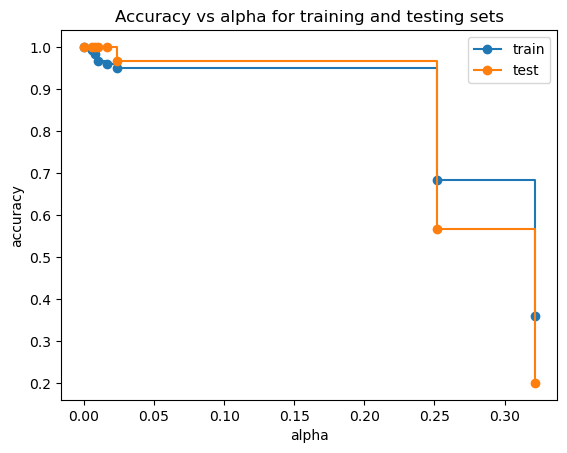

In [106]:
train_scores = [clf.score(X_Train, Y_Train) for clf in clfs]
test_scores = [clf.score(X_Test, Y_Test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()


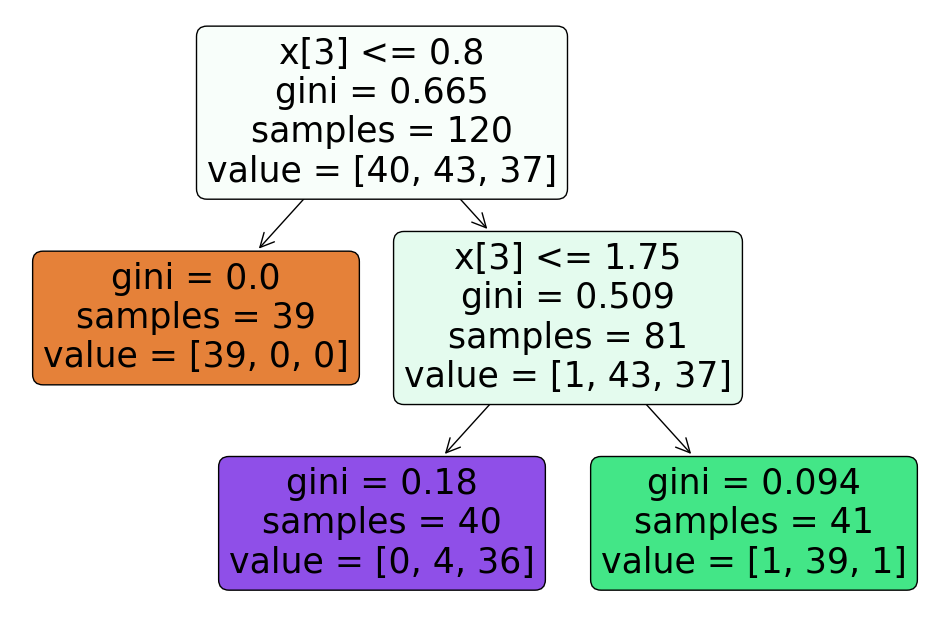

In [110]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.025)
clf.fit(X_Train,Y_Train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()


In [112]:
Y_Pr2=clf.predict(X_Test)

In [114]:
accuracy_score(Y_Test,Y_Pr2)

0.9666666666666667